In [1]:
# Works on pandas 2.0.0, numpy 1.24.2, matplotlib 3.7.1, scikit-learn 1.3.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# Reading the data
G = pd.read_csv("Bankruptcy100by100noNA.txt", sep="\t")

In [3]:
# Initialize the SVC model
svc_model = SVC(C=200, kernel='rbf', gamma=300, probability=True)   # Note that the gamma parameter in sklearn doesn't exactly match the sigma parameter in the R kernlab package.

# Fit the SVC model
svc_model.fit(G.iloc[:, [6, 27]], G.iloc[:, 2])

SVC(C=200, gamma=300, probability=True)

In [4]:
# Print a summary of the SVM model
print("Support Vector Machine model summary:")
print(f"SV type: C-SVC (classification)") # SV type
print(f"Parameter: cost C = {svc_model.C}") # C parameter
print(f"Gaussian Radial Basis kernel function.") # Kernel function
print(f"Hyperparameter: gamma = {svc_model.gamma}") # Hyperparameter
print(f"Number of Support Vectors: {len(svc_model.support_vectors_)}") # Number of support vectors

training_accuracy = svc_model.score(G.iloc[:, [6, 27]], G.iloc[:, 2]) # scikit-learn does not provide a direct training error metric. We can use the `score` method to get accuracy.
training_error = 1 - training_accuracy
print(f"Training error: {training_error:.2f}") # Training error

Support Vector Machine model summary:
SV type: C-SVC (classification)
Parameter: cost C = 200
Gaussian Radial Basis kernel function.
Hyperparameter: gamma = 300
Number of Support Vectors: 62
Training error: 0.10


c:\Users\41793\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


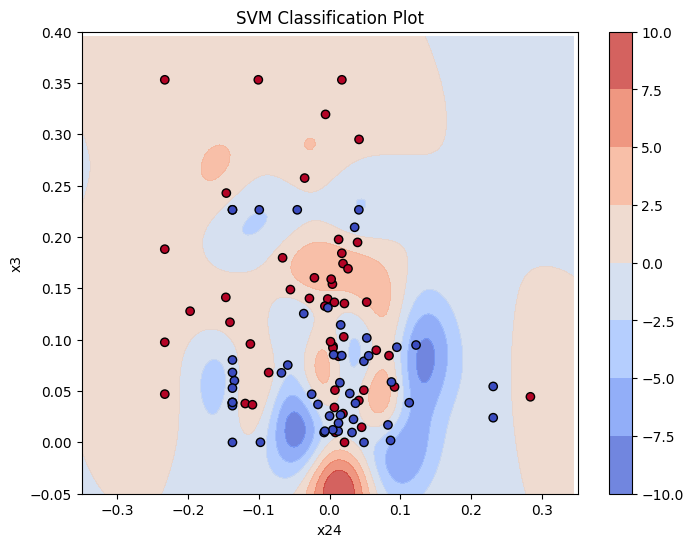

In [5]:
# Plotting
x_min, x_max = -0.35, 0.35
y_min, y_max = -0.05, 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))

# Evaluate the decision function for each point on the grid
Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the decision boundary and margins
contourf = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(G.iloc[:, 6], G.iloc[:, 27], c=G.iloc[:, 2], cmap=plt.cm.coolwarm, edgecolors='k')

# Limits of the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Label axes
plt.xlabel('x24')
plt.ylabel('x3')

# Title
plt.title('SVM Classification Plot')

# Color bar
cbar = plt.colorbar(contourf)

plt.show()